<a href="https://colab.research.google.com/github/SakaSaheed/AI-ML-Project/blob/main/Seismic_Project_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This code is for my Seismic Project


In [ ]:
#https://drive.google.com/file/d/1i_OvUbfV2oW-7kh3V_GiCaUASIyYuFlU/view?usp=sharing

In [ ]:
#Import data from google drive
import requests
import pandas as pd
from io import StringIO
def read_gd(sharingurl):
    file_id = sharingurl.split('/')[-2]
    download_url='https://drive.google.com/uc?export=download&id=' + file_id
    url = requests.get(download_url).text
    csv_raw = StringIO(url)
    return csv_raw

url = "https://drive.google.com/file/d/1i_OvUbfV2oW-7kh3V_GiCaUASIyYuFlU/view?usp=sharing"
data = read_gd(url)

df = pd.read_csv(data)

df.head()


,Distance,ChargeWeight,AvgPPV
0,300,1100,125.606667
1,350,1300,112.120000
2,400,1450,98.693333
3,450,1550,86.286667
4,500,1600,74.636667


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Distance      105 non-null    int64  
 1   ChargeWeight  105 non-null    int64  
 2   AvgPPV        105 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 2.6 KB


In [ ]:
df.describe()

,Distance,ChargeWeight,AvgPPV
count,105.000000,105.000000,105.000000
mean,1150.000000,1270.000000,33.699397
std,507.397204,247.254151,34.891379
min,300.000000,1000.000000,5.443333
25%,700.000000,1100.000000,10.110000
50%,1150.000000,1200.000000,17.116667
75%,1600.000000,1450.000000,45.056667
max,2000.000000,1900.000000,140.683333


In [ ]:
df.shape

(105, 3)

#Split the data into training and testing set

In [ ]:
#Splitting the data into feature (X) and target (y)
X = df.drop(columns=["AvgPPV"])
y = df["AvgPPV"]

df.head(5)

,Distance,ChargeWeight,AvgPPV
0,300,1100,125.606667
1,350,1300,112.120000
2,400,1450,98.693333
3,450,1550,86.286667
4,500,1600,74.636667


In [ ]:
# Splitting into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(84, 2)

In [ ]:
# Initializing and training the linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [ ]:
lr.intercept_

np.float64(105.86401430071106)

In [ ]:
pd.DataFrame(data=lr.coef_, index=X_train.columns)

,0
Distance,-0.061305
ChargeWeight,-0.001474


In [ ]:
# Making predictions on the test set
y_pred = lr.predict(X_test)

In [ ]:
y_pred

array([ -6.32656539,  -6.03182353,  -2.966589  ,  30.75099082,
        55.05181066,  12.13852725, -18.21907618,  48.99502707,
        54.38864148,  85.85152689,  30.67730536,  -9.24442899,
        27.68575629,   6.08174366,  63.731716  ,  72.85373412,
        54.09389962, -15.22752712,  48.47922881,   5.86068726,
        -3.04027447])

#Evaluate the model

In [ ]:
#Calculate Evaluation Metrix
from sklearn.metrics import root_mean_squared_error, mean_squared_error, r2_score, mean_absolute_error
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nLinear Regression")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R-squared: {r2:.3f}")


Linear Regression
Mean Absolute Error (MAE): 15.150
Mean Squared Error (RMSE): 18.016
R-squared: 0.610


#Visualize the model performance


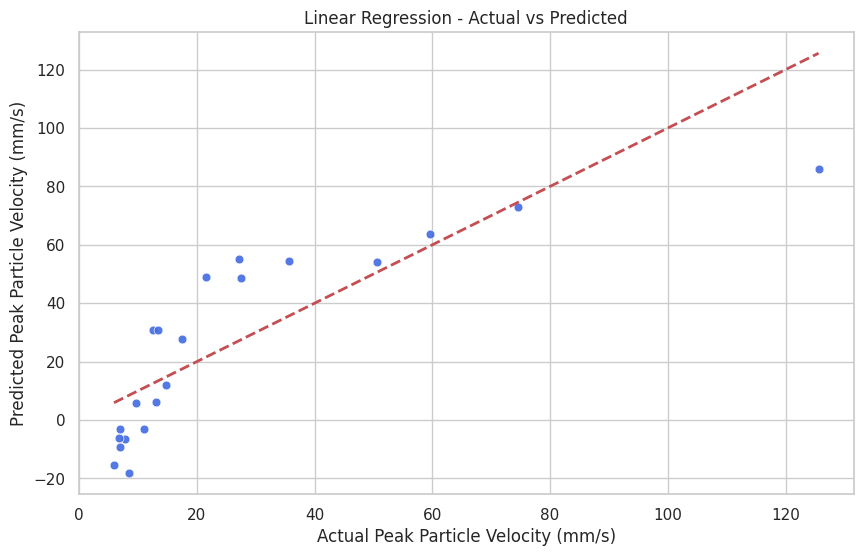

In [ ]:
# Plotting actual vs predicted values for Linear Regression
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='royalblue', s=40, alpha=0.9)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel("Actual Peak Particle Velocity (mm/s)")
plt.ylabel("Predicted Peak Particle Velocity (mm/s)")
plt.title("Linear Regression - Actual vs Predicted")
plt.show()

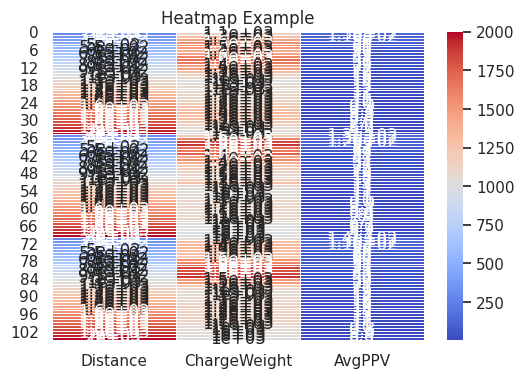

In [ ]:
#generate heatmap code for lightGBM model
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(data, annot=True, cmap="coolwarm", linewidths=0.5, cbar=True)

plt.title("Heatmap Example")
plt.show()

#heatmap


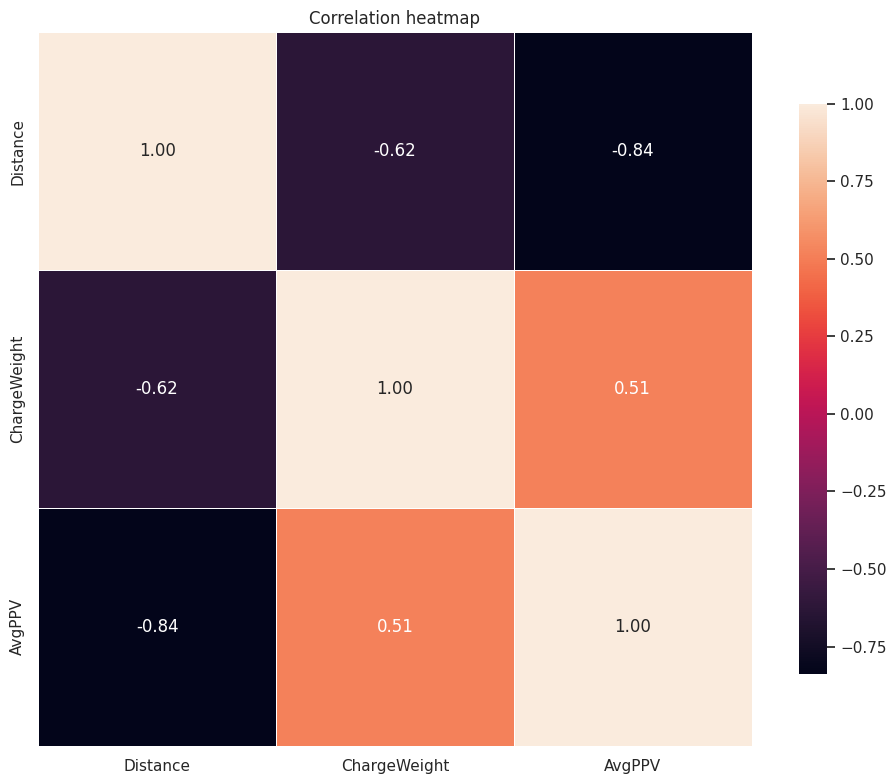

In [ ]:
# Correlation heatmap (seaborn)
!pip install seaborn --quiet

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# replace path if necessary (assumes Raisin_Dataset.csv is in working dir)
#df = pd.read_csv("Raisin_Dataset.csv")

# If dataset has non-numeric columns (like label), drop or convert them before corr()
numeric_df = df.select_dtypes(include=['number'])

corr = numeric_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=0.5, square=True, cbar_kws={"shrink": .8})
plt.title("Correlation heatmap")
plt.tight_layout()
plt.show()



#-------------------------------------------------

#LightGBM model

In [ ]:
## Initializing and training the LightGMB model
!pip install lightgbm



In [ ]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

X = df[['Distance', 'ChargeWeight']]
y = df['AvgPPV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_lgbm = LGBMRegressor()
model_lgbm.fit(X_train, y_train)
y_pred_lgbm = model_lgbm.predict(X_test)




[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 39
[LightGBM] [Info] Number of data points in the train set: 84, number of used features: 2
[LightGBM] [Info] Start training from score 35.489008
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

#Evaluate the Model LightGBM

In [ ]:
print("🔷 LightGBM Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_lgbm))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lgbm)))
print("R²:", r2_score(y_test, y_pred_lgbm))

🔷 LightGBM Results:
MAE: 6.848023770917745
RMSE: 11.20873642512865
R²: 0.8489311875307862


#Visualization of the model

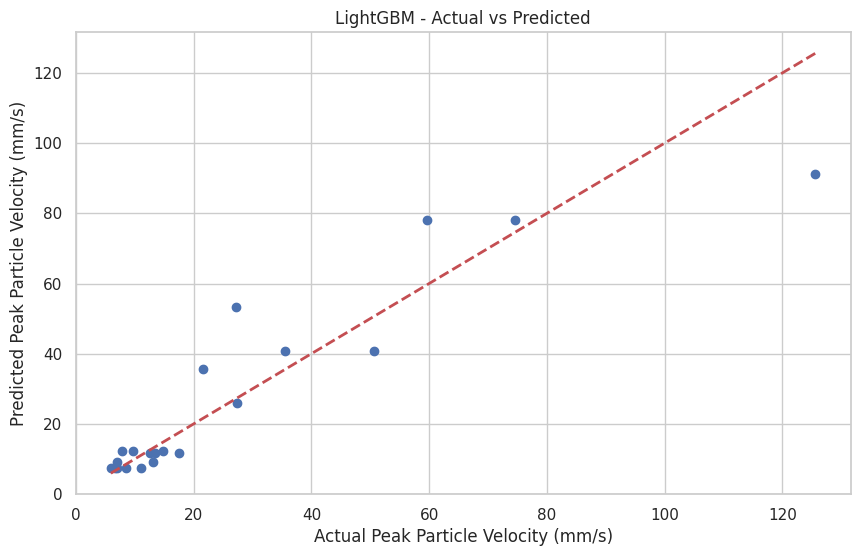

In [ ]:
#Visualize the model performance
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lgbm, color='royalblue', s=40, ax=plt.gca())
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)


plt.scatter(y_test, y_pred_lgbm)
plt.xlabel("Actual Peak Particle Velocity (mm/s)")
plt.ylabel("Predicted Peak Particle Velocity (mm/s)")
plt.title("LightGBM - Actual vs Predicted")
plt.show()

#Support Vector Regression Model

In [ ]:
#Initializing and training the Support Vector Regression model
from sklearn.svm import SVR

model_svr = SVR()
model_svr.fit(X_train, y_train)
y_pred_svr = model_svr.predict(X_test)


#Evaluate the model

In [ ]:
#Evaluate the model
print("Support Vector Regression (SVR) Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_svr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_svr)))
print("R²:", r2_score(y_test, y_pred_svr))

Support Vector Regression (SVR) Results:
MAE: 9.829378769285684
RMSE: 21.233199980716506
R²: 0.457883779485753


#Visualization of the model

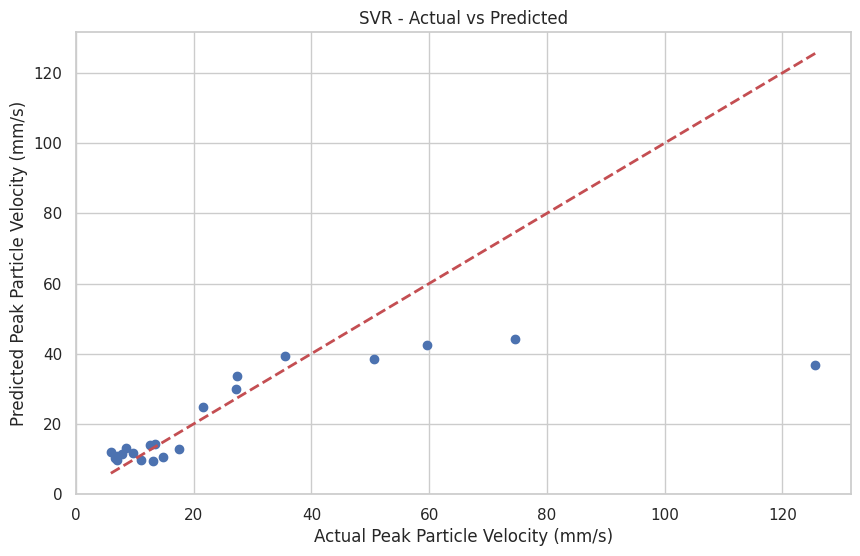

In [ ]:
#Visualize the model performance
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_svr, color='royalblue', s=40, ax=plt.gca())
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)


plt.scatter(y_test, y_pred_svr)
plt.xlabel("Actual Peak Particle Velocity (mm/s)")
plt.ylabel("Predicted Peak Particle Velocity (mm/s)")
plt.title("SVR - Actual vs Predicted")
plt.show()

#XGBoost Model

In [ ]:
#Initializing and training the XGBoost model
from xgboost import XGBRegressor

model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)

#Evaluate the Model

In [ ]:
#Evaluate the Model
print("XGBoost Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("R²:", r2_score(y_test, y_pred_xgb))

XGBoost Results:
MAE: 4.243656071165946
RMSE: 5.185210166650635
R²: 0.9676708542278459


#Visualize the Model

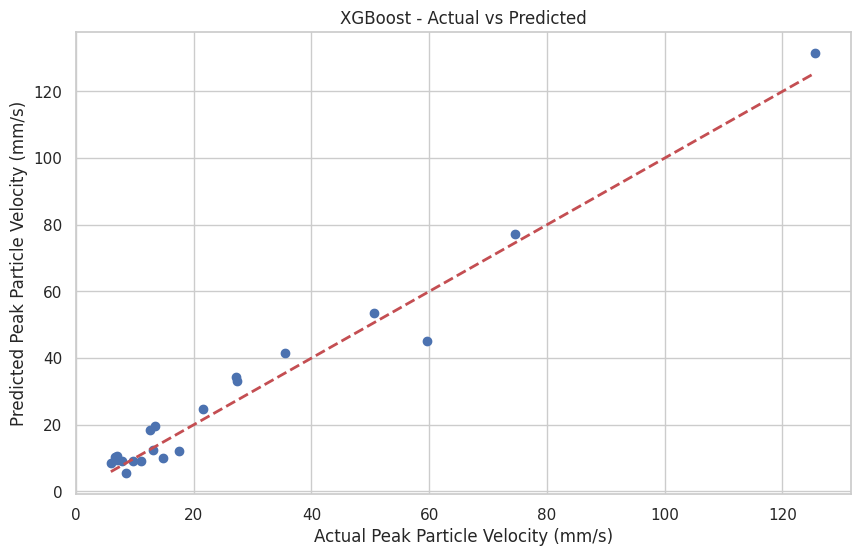

In [ ]:
#Visualize the Model
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb, color='royalblue', s=40, ax=plt.gca())
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)


plt.scatter(y_test, y_pred_xgb)
plt.xlabel("Actual Peak Particle Velocity (mm/s)")
plt.ylabel("Predicted Peak Particle Velocity (mm/s)")
plt.title("XGBoost - Actual vs Predicted")
plt.show()

#CatBoost Model

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.6 MB/s eta 0:00:00


In [ ]:
#Initialize and train for CatBoost Model
from catboost import CatBoostRegressor

model_catboost = CatBoostRegressor()
model_catboost.fit(X_train, y_train)
y_pred_catboost = model_catboost.predict(X_test)

Learning rate set to 0.027683
0:	learn: 35.1337871	total: 48.4ms	remaining: 48.3s
1:	learn: 34.5246612	total: 48.6ms	remaining: 24.2s
2:	learn: 33.9138096	total: 48.7ms	remaining: 16.2s
3:	learn: 33.3739836	total: 48.9ms	remaining: 12.2s
4:	learn: 32.7563205	total: 49.1ms	remaining: 9.77s
5:	learn: 32.1189100	total: 49.3ms	remaining: 8.16s
6:	learn: 31.6535233	total: 49.5ms	remaining: 7.02s
7:	learn: 31.1442609	total: 49.7ms	remaining: 6.16s
8:	learn: 30.6280769	total: 49.9ms	remaining: 5.49s
9:	learn: 30.0630438	total: 50ms	remaining: 4.95s
10:	learn: 29.5612069	total: 50.2ms	remaining: 4.51s
11:	learn: 29.0699106	total: 50.4ms	remaining: 4.15s
12:	learn: 28.5565050	total: 50.5ms	remaining: 3.83s
13:	learn: 28.0913251	total: 50.7ms	remaining: 3.57s
14:	learn: 27.6241664	total: 50.8ms	remaining: 3.33s
15:	learn: 27.1529792	total: 50.9ms	remaining: 3.13s
16:	learn: 26.7071191	total: 51.1ms	remaining: 2.95s
17:	learn: 26.2857391	total: 51.3ms	remaining: 2.8s
18:	learn: 25.8780967	total: 

#Evaluate the model

In [ ]:
#Evaluate the model
print("CatBoost Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_catboost))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_catboost)))
print("R²:", r2_score(y_test, y_pred_catboost))

CatBoost Results:
MAE: 4.09552294956442
RMSE: 5.309071316330294
R²: 0.9661078889954218


#Visualize the model performance

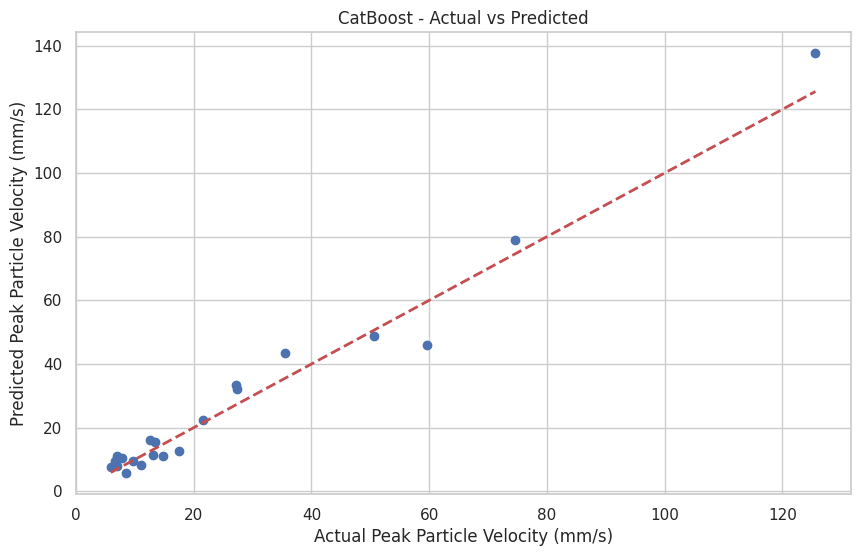

In [ ]:
#Visualize the model performance for CatBoost
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_catboost, color='royalblue', s=40, ax=plt.gca())
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)


plt.scatter(y_test, y_pred_catboost)
plt.xlabel("Actual Peak Particle Velocity (mm/s)")
plt.ylabel("Predicted Peak Particle Velocity (mm/s)")
plt.title("CatBoost - Actual vs Predicted")
plt.show()

#Model for Random Forest

In [ ]:
#Initialize and train Model for Random Forest
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

#Evaluate the Model

In [ ]:
#Evaluate the Model
print("Random Forest Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R²:", r2_score(y_test, y_pred_rf))

Random Forest Results:
MAE: 3.9838811081574783
RMSE: 5.09143386283073
R²: 0.9688296473961431


#Visualize the Model

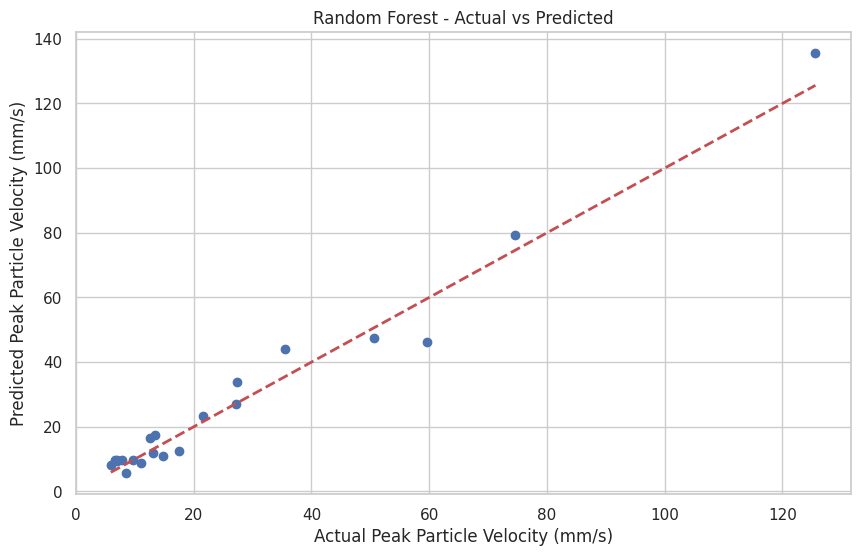

In [ ]:
#Visualize the Model
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, color='royalblue', s=40, ax=plt.gca())
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)


plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Peak Particle Velocity (mm/s)")
plt.ylabel("Predicted Peak Particle Velocity (mm/s)")
plt.title("Random Forest - Actual vs Predicted")
plt.show()

#Model for Artificial Neural Network

In [ ]:
#Initialize and train Model for Artificial Neural Network
from sklearn.neural_network import MLPRegressor

model_ann = MLPRegressor()
model_ann.fit(X_train, y_train)
y_pred_ann = model_ann.predict(X_test)

#Evaluate the Model

In [ ]:
#Evaluate the Model
print("Artificial Neural Network (ANN) Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_ann))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ann)))
print("R²:", r2_score(y_test, y_pred_ann))

Artificial Neural Network (ANN) Results:
MAE: 54.941118879199834
RMSE: 59.09966689970524
R²: -3.199828611756991


#Visualize the Model

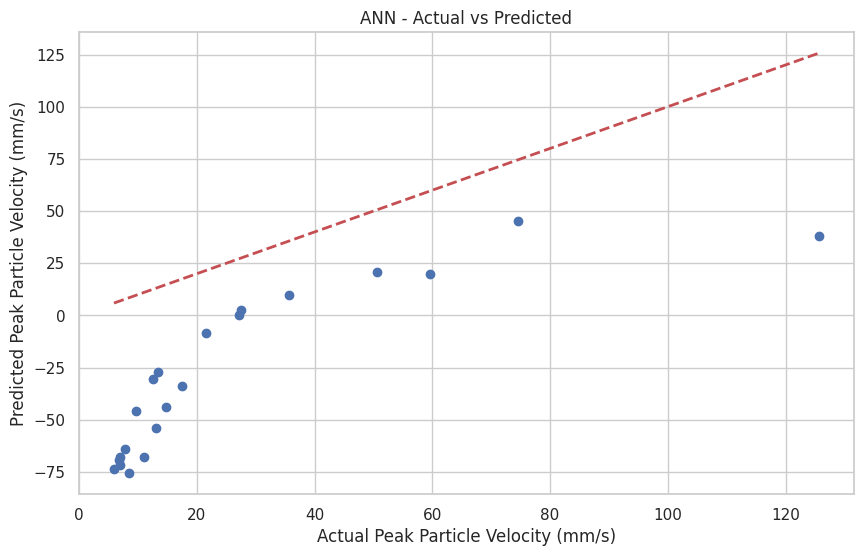

In [ ]:
#Visualize the Model
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_ann, color='royalblue', s=40, ax=plt.gca())
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)

plt.scatter(y_test, y_pred_ann)
plt.xlabel("Actual Peak Particle Velocity (mm/s)")
plt.ylabel("Predicted Peak Particle Velocity (mm/s)")
plt.title("ANN - Actual vs Predicted")
plt.show()

#Model for Polynomial Regression

In [ ]:
#Initialize and train Model for Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=8)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)
y_pred_poly = model_poly.predict(X_test_poly)

#Evaluate the Model

In [ ]:
#Evaluate the Model
print("Polynomial Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_poly))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_poly)))
print("R²:", r2_score(y_test, y_pred_poly))

Polynomial Regression Results:
MAE: 3.7847423081736378
RMSE: 5.053163252255916
R²: 0.9692964805557488


#Visualize the Model

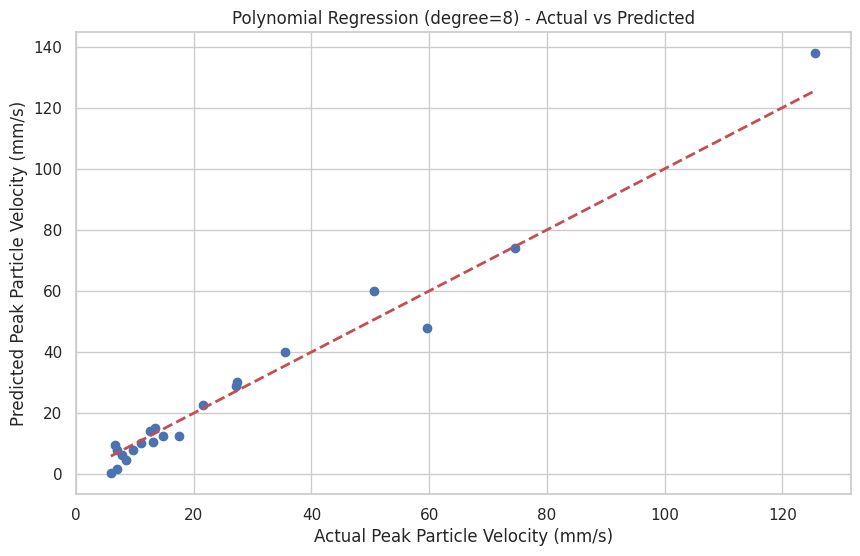

In [ ]:
#Visualize the Model
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_poly, color='royalblue', s=40, ax=plt.gca())
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)

plt.scatter(y_test, y_pred_poly)
plt.xlabel("Actual Peak Particle Velocity (mm/s)")
plt.ylabel("Predicted Peak Particle Velocity (mm/s)")
plt.title("Polynomial Regression (degree=8) - Actual vs Predicted")
plt.show()

#TabNet Model

In [ ]:
#Initialize and train model for TabNet model

from pytorch_tabnet.tab_model import TabNetRegressor

model_tabnet = TabNetRegressor()
model_tabnet.fit(X_train.values, y_train.values.reshape(-1, 1))
y_pred_tabnet = model_tabnet.predict(X_test.values)

ModuleNotFoundError: No module named 'pytorch_tabnet'

In [ ]:
%pip install pytorch-tabnet

#Evaluate the Model

In [ ]:
#Evaluate the Model
print("TabNet Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_tabnet))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_tabnet)))
print("R²:", r2_score(y_test, y_pred_tabnet))



#Visualize the Model

In [ ]:
#Visualize the Model
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_tabnet.flatten(), color='royalblue', s=40, ax=plt.gca())
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)

plt.scatter(y_test, y_pred_tabnet.flatten())
plt.xlabel("Actual Peak Particle Velocity (mm/s)")
plt.ylabel("Predicted Peak Particle Velocity (mm/s)")
plt.title("TabNet - Actual vs Predicted")
plt.show()

#CNN Model

In [ ]:
#Initialize and train with CNN Model
from sklearn.neural_network import MLPRegressor

model_cnn = MLPRegressor()
model_cnn.fit(X_train, y_train)
y_pred_cnn = model_cnn.predict(X_test)

#Evaluate the Model

In [ ]:
#Evaluate the Model
print("CNN Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_cnn))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_cnn)))
print("R²:", r2_score(y_test, y_pred_cnn))

#Visualize the Model for MLPRegressor

In [ ]:
#Visualize the Model for MLPRegressor
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_cnn, color='royalblue', s=40, ax=plt.gca())
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)

plt.scatter(y_test, y_pred_cnn)
plt.xlabel("Actual Peak Particle Velocity (mm/s)")
plt.ylabel("Predicted Peak Particle Velocity (mm/s)")
plt.title("MLPRegressor - Actual vs Predicted")
plt.show()

#Boost Random Forest

In [ ]:
#Initialize and train for Boost Random Forest
from sklearn.ensemble import RandomForestRegressor

model_brf = RandomForestRegressor()
model_brf.fit(X_train, y_train)
y_pred_brf = model_brf.predict(X_test)

#Evaluate the Boost Random Forest

In [ ]:
#Evaluate the Boost Random Forest
print("Boost Random Forest Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_brf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_brf)))
print("R²:", r2_score(y_test, y_pred_brf))

#Visualize the Boost Random Forest Model

In [ ]:
#Visualize the Boost Random Forest Model
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_brf, color='royalblue', s=40, ax=plt.gca())
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)

plt.scatter(y_test, y_pred_brf)
plt.xlabel("Actual Peak Particle Velocity (mm/s)")
plt.ylabel("Predicted Peak Particle Velocity (mm/s)")
plt.title("Boost Random Forest - Actual vs Predicted")
plt.show()